In [3]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


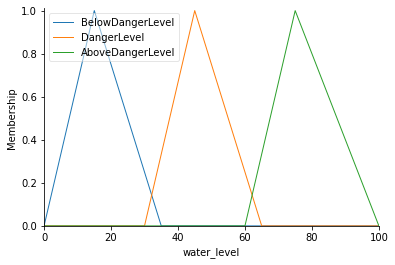

In [4]:
water_level=ctrl.Antecedent(np.arange(0,101,1),'water_level')
water_level['BelowDangerLevel'] = fuzzy.trimf(water_level.universe,[0,15,35])
water_level['DangerLevel'] = fuzzy.trimf(water_level.universe,[30,45,65])
water_level['AboveDangerLevel'] = fuzzy.trimf(water_level.universe,[60,75,100])
water_level.view()
plt.show()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


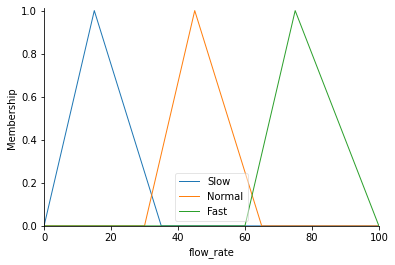

In [5]:
flow_rate=ctrl.Antecedent(np.arange(0,101,1),'flow_rate')
flow_rate['Slow'] = fuzzy.trimf(flow_rate.universe,[0,15,35])
flow_rate['Normal'] = fuzzy.trimf(flow_rate.universe,[30,45,65])
flow_rate['Fast'] = fuzzy.trimf(flow_rate.universe,[60,75,100])
flow_rate.view()
plt.show()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


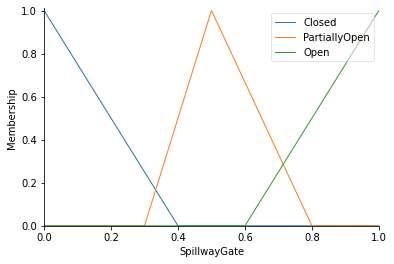

In [6]:
SpillwayGate=ctrl.Consequent(np.arange(0,1.1,0.1),'SpillwayGate')
SpillwayGate['Closed'] = fuzzy.trimf(SpillwayGate.universe,[0,0,0.4])
SpillwayGate['PartiallyOpen'] = fuzzy.trimf(SpillwayGate.universe,[0.3,0.5,0.8])
SpillwayGate['Open'] = fuzzy.trimf(SpillwayGate.universe,[0.6,1,1])
SpillwayGate.view()
plt.show()

In [7]:
rule1=ctrl.Rule(water_level['BelowDangerLevel'] & flow_rate['Slow'], SpillwayGate['Closed'])
rule2=ctrl.Rule(water_level['BelowDangerLevel'] & flow_rate['Normal'], SpillwayGate['Closed'])
rule3=ctrl.Rule(water_level['BelowDangerLevel'] & flow_rate['Fast'], SpillwayGate['PartiallyOpen'])
rule4=ctrl.Rule(water_level['DangerLevel'] & flow_rate['Slow'], SpillwayGate['PartiallyOpen'])
rule5=ctrl.Rule(water_level['DangerLevel'] & flow_rate['Normal'], SpillwayGate['PartiallyOpen'])
rule6=ctrl.Rule(water_level['DangerLevel'] & flow_rate['Fast'], SpillwayGate['Open'])
rule7=ctrl.Rule(water_level['AboveDangerLevel'] & flow_rate['Slow'], SpillwayGate['Open'])
rule8=ctrl.Rule(water_level['AboveDangerLevel'] & flow_rate['Normal'], SpillwayGate['Open'])
rule9=ctrl.Rule(water_level['AboveDangerLevel'] & flow_rate['Fast'], SpillwayGate['Open'])
rule=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]

In [8]:
a=ctrl.ControlSystem(rule)
b=ctrl.ControlSystemSimulation(a)

In [9]:
b.input['water_level'] = 65
b.input['flow_rate'] = 89
b.compute()
print(b.output['SpillwayGate'])

0.8311111111111111


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


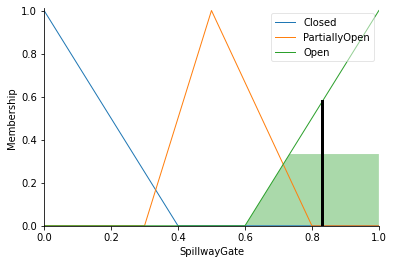

In [10]:
SpillwayGate.view(sim=b)
plt.show()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


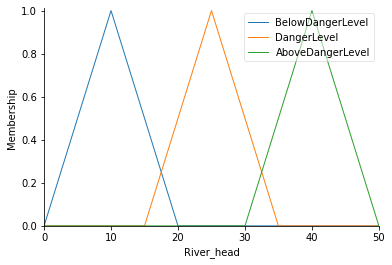

In [11]:
river_head=ctrl.Antecedent(np.arange(0,51,5),'River_head')
river_head['BelowDangerLevel'] = fuzzy.trimf(river_head.universe,[0,10,20])
river_head['DangerLevel'] = fuzzy.trimf(river_head.universe,[15,25,35])
river_head['AboveDangerLevel'] = fuzzy.trimf(river_head.universe,[30,40,50])
river_head.view()
plt.show()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


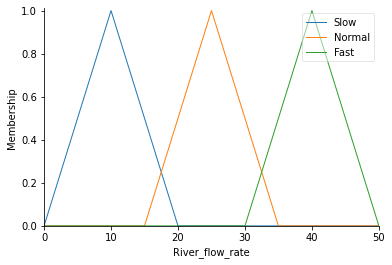

In [12]:
river_flow_rate=ctrl.Antecedent(np.arange(0,51,5),'River_flow_rate')
river_flow_rate['Slow'] = fuzzy.trimf(river_flow_rate.universe,[0,10,20])
river_flow_rate['Normal'] = fuzzy.trimf(river_flow_rate.universe,[15,25,35])
river_flow_rate['Fast'] = fuzzy.trimf(river_flow_rate.universe,[30,40,50])
river_flow_rate.view()
plt.show()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


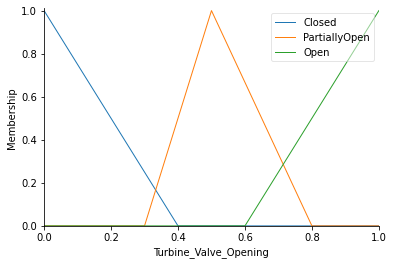

In [13]:
TurbineValveOpening=ctrl.Consequent(np.arange(0,1.1,0.1),'Turbine_Valve_Opening')
TurbineValveOpening['Closed'] = fuzzy.trimf(TurbineValveOpening.universe,[0,0,0.4])
TurbineValveOpening['PartiallyOpen'] = fuzzy.trimf(TurbineValveOpening.universe,[0.3,0.5,0.8])
TurbineValveOpening['Open'] = fuzzy.trimf(TurbineValveOpening.universe,[0.6,1,1])
TurbineValveOpening.view()
plt.show()

In [14]:
rule11=ctrl.Rule(river_head['BelowDangerLevel'] & river_flow_rate['Slow'], TurbineValveOpening['Closed'])
rule22=ctrl.Rule(river_head['BelowDangerLevel'] & river_flow_rate['Normal'], TurbineValveOpening['Closed'])
rule33=ctrl.Rule(river_head['BelowDangerLevel'] & river_flow_rate['Fast'], TurbineValveOpening['PartiallyOpen'])
rule44=ctrl.Rule(river_head['DangerLevel'] & river_flow_rate['Slow'], TurbineValveOpening['PartiallyOpen'])
rule55=ctrl.Rule(river_head['DangerLevel'] & river_flow_rate['Normal'], TurbineValveOpening['PartiallyOpen'])
rule66=ctrl.Rule(river_head['DangerLevel'] & river_flow_rate['Fast'], TurbineValveOpening['Open'])
rule77=ctrl.Rule(river_head['AboveDangerLevel'] & river_flow_rate['Slow'], TurbineValveOpening['Open'])
rule88=ctrl.Rule(river_head['AboveDangerLevel'] & river_flow_rate['Normal'], TurbineValveOpening['Open'])
rule99=ctrl.Rule(river_head['AboveDangerLevel'] & river_flow_rate['Fast'], TurbineValveOpening['Open'])
rule_over_head=[rule11,rule22,rule33,rule44,rule55,rule66,rule77,rule88,rule99]

In [15]:
x=ctrl.ControlSystem(rule_over_head)
y=ctrl.ControlSystemSimulation(x)

In [16]:
y.input['River_head'] = 34
y.input['River_flow_rate'] = 40
y.compute()
print(y.output['Turbine_Valve_Opening'])

0.8366666666666667


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


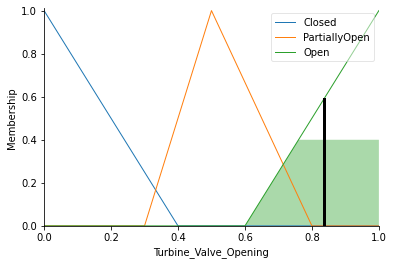

In [17]:
TurbineValveOpening.view(sim=y)
plt.show()